In [2]:
import os
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from glob import glob
from scipy import ndimage

from skimage.exposure import match_histograms

from utils import place_in_img

In [3]:
# These are points in the reference segmentation that correspond to the different 
# wing cells based on naming conventions from Charlie
FWL_points = [[483.79435484, 193.88116599],
       [549.73857527, 236.61302083],
       [567.67540323, 192.82605847],
       [618.84811828, 155.36974126],
       [657.35954301, 114.74810148],
       [662.10752688,  56.7171875 ]]

MC_points = [[497.51075269,  37.19769825],
       [549.73857527,  33.50482191],
       [509.11693548,  47.74877352]]

SM1s_points = [[407.29905914,  65.15804772],
       [431.56653226,  58.82740255]]

SM2s_points = [[460.58198925,  86.26019825],
       [482.21169355,  72.5438004 ],
       [474.2983871 ,  84.67753696]]

SM3s_points = [[533.91196237,  80.45710685],
       [537.07728495,  68.85092406],
       [550.7936828 ,  89.42552083],
       [520.19556452,  84.67753696]]

MdC2_points = [[474.82594086, 129.51960685],
       [431.56653226, 141.12578965],
       [513.33736559, 120.55119288]]

other_points = [[273.30040323, 179.63721438],
       [245.86760753,  92.59084341],
       [341.88239247, 118.44097782],
       [263.80443548,  22.95374664],
       [193.63978495, 207.59756384],
       [729.6344086 , 209.18022513],]
       #[ 52.25537634, 107.88990255]]



In [4]:
def transform_points(pts, center_pos, move, scale, angle, is_facing_up, img_height):
    ps = np.array(pts)
    if not is_facing_up:
        ps[:,1] = img_height - ps[:,1]
    # get coordinates relative to center of the reference segmentation
    ps = ps - np.array([center_pos[0], center_pos[1]])
    ps = ps + move
    
    rot_matrix = cv2.getRotationMatrix2D((int(move[0]),int(move[1])), angle, scale)
    ps = np.concatenate([ps, np.ones((ps.shape[0],1))], axis=1)
    ps = np.matmul(ps, rot_matrix.T)
    return ps

In [5]:
for fn in cant_see + needs_manual_fixing:
    fn = fn.split('.')[0]
    fp = '../2_live_bees/6_fine_registered_wings/' + fn + '.png'
    metadata_fp = '../2_live_bees/6_fine_registered_wings_metadata/' + fn + '.json'
    if os.path.exists(fp):
        os.remove(fp)
    if os.path.exists(metadata_fp):
        os.remove(metadata_fp)

NameError: name 'cant_see' is not defined

In [479]:
print(f'{fn}')
print(f"    '{fn}':{n_orb_features},")

2024_08_08_h33b49.json
    '2024_08_08_h33b49.json':4000,


In [5]:
cant_see = ['2024_06_05_h01bee19.png', '2024_06_05_h01bee27.png', '2024_06_05_h01bee32.png','2024_06_05_h01bee45.png',
           '2024_06_06_h05bee07.png','2024_06_07_h02bee38.png','2024_06_10_h02b32.png', 
            '2024_06_06_h05bee11.png','2024_06_06_h05bee32.png','2024_06_07_h02bee34.png','2024_07_23_h21b28.png']

manual_no_features = {
    '2024_08_08_h33b49.json':4000,
    '2024_08_05_h32b13.json':1000,
    '2024_08_02_h33b24X.json':1000,
    '2024_07_30_h35b46.json':2000,
    '2024_07_29_h32b37.json':2000,
    '2024_07_25_h31b38.json':3000,
    '2024_07_23_h35b50.json':3000,
    '2024_07_19_h34b57.json':2000,
    '2024_07_19_h25b02.json':4000,
    '2024_07_18_h24b04.json':4000,
    '2024_07_17_h31b22.json':2000,
    '2024_07_17_h31b04.json':2000,
    '2024_07_17_h21b23.json':2000,
    '2024_07_16_h32b13.json':4000,
    '2024_07_16_h32b04.json':4000,
    '2024_07_16_h32b01.json':4000,
    '2024_07_16_h23b05.json':4000,
    '2024_07_16_h23b01.json':2000,
    '2024_07_15_h22b02.json':1000,
    '2024_07_12_h25b24.json':3000,
    '2024_07_12_h14b30.json':3000,
    '2024_07_12_h14b18.json':3000,
    '2024_07_10_h24b18.json':3000,
    '2024_07_10_h24b07.json':3000,
    '2024_07_10_h15b31.json':3000,
    '2024_07_09_h13b23.json':3000,
    '2024_07_08_h12b07.json':3000,
    '2024_07_08_h12b05.json':7000,
    '2024_07_05_h12b23.json':4000,
    '2024_07_04_h24b20.json':2000,
    '2024_07_04_h24b12.json':2000,
    '2024_07_04_h22b26.json':2000,
    '2024_07_04_h22b24.json':2000,
    '2024_07_04_h22b05.json':2000,
    '2024_07_04_h22b03.json':2000,
    '2024_07_04_h14b35.json':2000,
    '2024_07_04_h14b34.json':10000,
    '2024_07_04_h14b02.json':3000,
    '2024_07_03_h25b29.json':2000,
    '2024_07_03_h15b04.json':2000,
    '2024_07_03_h25b23.json':2000,
    '2024_07_02_h13b29.json':2000,
    '2024_07_02_h13b22.json':2000,
    '2024_07_02_h13b02.json':2000,
    '2024_07_01_h11b11.json':3000,
    '2024_06_28_h13b37.json':2000,
    '2024_06_28_h05b87.json':2000,
    '2024_06_28_h05b82.json':2000,
    '2024_06_27_h14b35.json':1000,
    '2024_06_27_h01b21.json':1000,
    '2024_06_27_h01b15.json':3000,
    '2024_06_27_h01b01.json':2000,
    '2024_06_26_h11b16.json':2000,
    '2024_06_26_h04b48.json':2000,
    '2024_06_25_h15b03.json':2000,
    '2024_06_25_h03b73.json':2000,
    '2024_06_25_h03b41.json':2000,
    '2024_06_25_h03b39.json':2000,
    '2024_06_24_h12b21.json':2000,
    '2024_06_24_h12b16.json':1000,
    '2024_06_21_h15b11.json':1000,
    '2024_06_21_h05b15.json':3000,
    '2024_06_20_h14b02.json':3000,
    '2024_06_20_h12b07.json':4000,
    '2024_06_20_h12b01.json':1000,
    '2024_06_20_h03b21.json':1000,
    '2024_06_19_h13b36.json':2000,
    '2024_06_19_h13b26.json':2000,
    '2024_06_19_h13b22.json':2000,
    '2024_06_19_h01b42.json':2000,
    '2024_06_18_h11b21.json':2000,
    '2024_06_18_h11b03.json':2000,
    '2024_06_18_h02b16.json':2000,
    '2024_06_14_h03b02.json':2000,
    '2024_06_13_h05b78.json':2000,
    '2024_06_13_h05b54.json':2000,
    '2024_06_13_h05b07.json':2000,
    '2024_06_12_h04b24.json':1000,
    '2024_06_11_h01b42.json':1000,
    '2024_06_10_h02b15.json':1000,
    '2024_06_07_h04bee44.json':2000,
    '2024_06_07_h04bee16.json':1000,
    '2024_06_07_h04bee14.json':1000,
    '2024_06_07_h02bee46.json':3000,
    '2024_06_07_h02bee41.json':2000,
    '2024_06_06_h05bee62.json':1000,
    '2024_06_06_h03bee39.json':1000,
    '2024_06_06_h03bee23.json':10000,
    '2024_08_07_h34b48.json':4000,
    '2024_08_07_h34b13.json':4000,
    '2024_08_06_h35b38.json':4000,
    '2024_08_05_h32b31.json':4000,
    '2024_08_05_h32b29.json':4000,
    '2024_08_05_h32b16.json':4000,
    '2024_08_05_h32b11.json':4000,
    '2024_08_01_h34b46.json':2000,
    '2024_08_01_h34b31.json':1000,
    '2024_08_01_h34b30.json':4000,
    '2024_08_01_h34b23.json':2000,
    '2024_08_01_h34b14.json':2000,
    '2024_07_31_h31b79.json':2000,
    '2024_07_31_h31b74.json':2000,
    '2024_07_31_h31b40.json':2000,
    '2024_07_31_h31b19.json':4000,
    '2024_07_31_h31b12.json':4000,
    '2024_07_31_h31b01.json':4000,
    '2024_07_30_h35b55.json':4000,
    '2024_07_30_h35b33.json':4000,
    '2024_07_30_h35b27.json':4000,
    '2024_07_30_h35b11.json':10000,
    '2024_07_30_h35b01.json':10000,
    '2024_07_29_h32b43.json':4000,
    '2024_07_29_h32b21.json':4000,
    '2024_07_26_h32b37.json':2000,
    '2024_07_26_h32b33.json':2000,
    '2024_07_26_h32b20.json':4000,
    '2024_07_26_h22b32.json':4000,
    '2024_07_26_h22b11.json':4000,
    '2024_07_25_h31b79.json':4000,
    '2024_07_25_h31b63.json':4000,
    '2024_07_25_h31b43.json':4000,
    '2024_07_25_h31b13.json':4000,
    '2024_07_25_h24b18.json':1000,
    '2024_07_25_h24b02.json':1000,
    '2024_07_24_h34b42.json':4000,
    '2024_07_24_h34b33.json':4000,
    '2024_07_24_h34b28.json':4000,
    '2024_07_24_h34b25.json':4000,
    '2024_07_24_h34b13.json':4000,
    '2024_07_24_h34b12.json':4000,
    '2024_07_24_h34b11.json':4000,
    '2024_07_23_h35b54.json':4000,
    '2024_07_23_h35b47.json':4000,
    '2024_07_23_h35b29.json':4000,
    '2024_07_23_h35b27.json':4000,
    '2024_07_23_h35b11.json':4000,
    '2024_07_23_h35b01.json':4000,
    '2024_07_23_h21b27.json':2000,
    '2024_07_22_h33b33.json':2000,
    '2024_07_22_h33b32.json':2000,
    '2024_07_22_h33b07.json':2000,
    '2024_07_19_h35b32.json':2000,
    '2024_07_19_h35b11.json':2000,
    '2024_07_19_h35b02.json':2000,
    '2024_07_19_h34b30.json':2000,
    '2024_07_19_h34b28.json':1000,
    '2024_07_19_h34b21.json':1000,
    '2024_07_19_h34b20.json':1000,
    '2024_07_19_h34b17.json':10000,
    '2024_07_19_h34b15.json':7000,
    '2024_07_19_h25b32.json':7000,
    '2024_07_18_h33b35.json':7000,
    '2024_07_18_h33b33.json':7000,
    '2024_07_18_h33b25.json':1000,
    '2024_07_18_h33b24.json':4000,
    '2024_07_18_h33b01.json':1000,
    '2024_07_18_h24b02.json':1000,
    '2024_07_17_h31b39.json':2000,
    '2024_07_17_h31b38.json':2000,
    '2024_07_17_h31b31.json':2000,
    '2024_07_17_h31b16.json':2000,
    '2024_07_17_h21b10.json':2000,
    '2024_07_16_h32b24.json':2000,
    '2024_07_16_h32b18.json':2000,
    '2024_07_16_h32b10.json':2000,
    '2024_07_16_h23b12.json':2000,
    '2024_07_15_h22b32.json':2000,
    '2024_07_15_h22b15.json':2000,
    '2024_07_15_h22b12.json':2000,
    '2024_07_15_h22b01.json':2000,
    '2024_07_12_h25b35.json':2000,
    '2024_07_12_h25b32.json':2000,
    '2024_07_12_h14b37.json':2000,
    '2024_07_12_h14b22.json':1000,
    '2024_07_11_h23b12.json':3000,
    '2024_07_10_h24b15.json':3000,
    '2024_07_10_h24b10.json':3000,
    '2024_07_10_h24b05.json':3000,
    '2024_07_10_h24b02.json':3000,
    '2024_07_10_h15b24.json':1000,
    '2024_07_10_h15b14.json':1000,
    '2024_07_09_h22b32.json':2000,
    '2024_07_09_h22b31.json':2000,
    '2024_07_09_h22b11.json':2000,
    '2024_07_09_h13b32.json':2000,
    '2024_07_09_h13b28.json':2000,
    '2024_07_09_h13b26.json':2000,
    '2024_07_09_h13b24.json':2000,
    '2024_07_08_h21b12.json':2000,
    '2024_07_08_h12b41.json':2000,
    '2024_07_08_h12b40.json':2000,
    '2024_07_08_h12b16.json':2000,
    '2024_07_08_h12b12.json':2000,
    '2024_07_05_h21b32.json':2000,
    '2024_07_05_h21b24.json':2000,
    '2024_07_05_h21b20.json':2000,
    '2024_07_05_h21b10.json':2000,
    '2024_07_05_h12b43.json':2000,
    '2024_07_05_h12b40.json':2000,
    '2024_07_05_h12b37.json':1000,
    '2024_07_05_h12b35.json':2000,
    '2024_07_05_h12b31.json':2000,
    '2024_07_05_h12b29.json':4000,
    '2024_07_05_h12b28.json':4000,
    '2024_07_05_h12b20.json':4000,
    '2024_07_05_h12b18.json':4000,
    '2024_07_05_h12b12.json':3000,
    '2024_07_05_h12b10.json':3000,
    '2024_07_05_h12b07.json':3000,
    '2024_07_04_h24b15.json':18000,
    '2024_07_04_h22b33.json':3000,
    '2024_07_04_h22b32.json':3000,
    '2024_07_04_h22b29.json':2000,
    '2024_07_04_h14b22.json':2000,
    '2024_07_04_h14b21.json':3000,
    '2024_07_04_h14b18.json':3000,
    '2024_07_03_h25b35.json':2000,
    '2024_07_03_h25b20.json':1000,
    '2024_07_03_h25b16.json':1000,
    '2024_07_03_h25b10.json':1000,
    '2024_07_03_h15b28.json':1000,
    '2024_07_03_h15b25.json':1000,
    '2024_07_03_h15b12.json':2000,
    '2024_07_02_h23b15.json':2000,
    '2024_07_02_h23b04.json':2000,
    '2024_07_02_h23b01.json':2000,
    '2024_07_02_h13b26.json':2000,
    '2024_07_02_h13b20.json':2000,
    '2024_07_02_h13b03.json':2000,
    '2024_07_01_h11b19.json':2000,
    '2024_07_01_h11b16.json':2000,
    '2024_07_01_h11b14.json':2000,
    '2024_07_01_h11b12.json':2000,
    '2024_07_01_h11b10.json':2000,
    '2024_07_01_h11b03.json':1000,
    '2024_06_28_h13b15.json':2000,
    '2024_06_28_h13b13.json':2000,
    '2024_06_27_h14b40.json':10000,
    '2024_06_27_h14b34.json':2000,
    '2024_06_27_h14b33.json':2000,
    '2024_06_27_h14b27.json':1000,
    '2024_06_27_h14b22.json':1000,
    '2024_06_27_h14b20.json':2000,
    '2024_06_27_h14b19.json':1000,
    '2024_06_27_h14b18.json':1000,
    '2024_06_27_h14b15.json':2000,
    '2024_06_27_h01b42.json':2000,
    '2024_06_27_h01b30.json':1000,
    '2024_06_26_h11b12.json':1000,
    '2024_06_26_h11b11.json':2000,
    '2024_06_26_h11b10.json':3000,
    '2024_06_26_h11b07.json':3000,
    '2024_06_26_h11b03.json':4000,
    '2024_06_26_h11b01.json':4000,
    '2024_06_26_h04b26.json':4000,
    '2024_06_26_h04b13.json':3000,
    '2024_06_25_h15b32.json':2000,
    '2024_06_25_h15b22.json':1000,
    '2024_06_25_h15b10.json':1000,
    '2024_06_25_h15b07.json':1000,
    '2024_06_25_h15b04.json':1000,
    '2024_06_25_h15b01.json':1000,
    '2024_06_25_h03b21.json':7000,
    '2024_06_24_h12b38.json':7000,
    '2024_06_24_h12b33.json':4000,
    '2024_06_24_h12b26.json':4000,
    '2024_06_24_h12b13.json':4000,
    '2024_06_24_h12b10.json':4000,
    '2024_06_24_h02b62.json':4000,
    '2024_06_24_h02b48.json':4000,
    '2024_06_05_h01bee01.json':2000,
    '2024_06_06_h03bee15.json':1000,
    '2024_06_06_h03bee25.json':18000,
    '2024_06_06_h03bee29.json':18000,
    '2024_06_06_h05bee07.json':1000,
    '2024_06_06_h05bee10.json':1000,
    '2024_06_06_h05bee21.json':7000,
    '2024_06_06_h05bee21.json':7000,
    '2024_06_06_h05bee37.json':7000,
    '2024_06_06_h05bee50.json':1000,
    '2024_06_07_h02bee01.json':1000,
    '2024_06_07_h02bee34.json':20000,
    '2024_06_07_h02bee50.json':1000,
    '2024_06_07_h04bee02.json':1000,
    '2024_06_07_h04bee03.json':18000,
    '2024_06_07_h04bee18.json':1000,
    '2024_06_07_h04bee33.json':1000,
    '2024_06_10_h02b10.json':2000,
    '2024_06_10_h02b12.json':2000,
    '2024_06_10_h02b14.json':4000,
    '2024_06_10_h02b21.json':4000,
    '2024_06_10_h02b67.json':2000,
    '2024_06_11_h01b21.json':3000,
    '2024_06_11_h01b25.json':3000,
    '2024_06_11_h01b39.json':3000,
    '2024_06_11_h01b40.json':3000,
    '2024_06_11_h01b41.json':3000,
    '2024_06_12_h04b21.json':3000,
    '2024_06_13_h05b02.json':3000,
    '2024_06_14_h03b26.json':2000,
    '2024_06_17_h04b32.json':2000,
    '2024_06_17_h04b33.json':2000,
    '2024_06_18_h02b12.json':2000,
    '2024_06_18_h02b51.json':2000,
    '2024_06_18_h02b62.json':2000,
    '2024_06_18_h02b71.json':1000,
    '2024_06_18_h11b01.json':1000,
    '2024_06_19_h01b03.json':1000,
    '2024_06_19_h01b17.json':1000,
    '2024_06_19_h13b13.json':1000,
    '2024_06_20_h03b10.json':1000,
    '2024_06_20_h03b16.json':1000,
    '2024_06_20_h03b20.json':1000,
    '2024_06_20_h03b25.json':1000,
    '2024_06_20_h03b44-deformedWing.json':2000,
    '2024_06_20_h03b77.json':2000,
    '2024_06_20_h12b03.json':2000,
    '2024_06_20_h12b10.json':10000,
    '2024_06_20_h12b18.json':1000,
    '2024_06_20_h12b26.json':1000,
    '2024_06_20_h14b21.json':1000,
    '2024_06_20_h14b27.json':1000,
    '2024_06_20_h14b40.json':1000,
    '2024_06_21_h05b48.json':3000,
    '2024_06_21_h05b57.json':3000,
    '2024_06_21_h15b19.json':4000,
    '2024_06_21_h15b27.json':4000,
    '2024_06_24_h02b29.json':4000,
    '2024_06_24_h02b31.json':4000,
    '2024_06_24_h02b36.json':4000,


}
good_enough_as_is = [
    '2024_06_05_h01bee16.json',
    '2024_06_05_h01bee21.json',
    '2024_06_05_h01bee51.json',
    '2024_06_06_h03bee52.json',
    '2024_06_06_h05bee03.json',
    '2024_06_06_h05bee16.json',
    '2024_06_07_h02bee11.json',
    '2024_06_10_h02b36.json',
    '2024_06_19_h13b15.json',
    '2024_06_20_h12b05.json',
    '2024_06_21_h15b18.json',
    '2024_06_26_h11b26.json',
     '2024_07_02_h13b19.json',
 '2024_07_04_h14b01.json',
 '2024_07_04_h14b17.json',
 '2024_07_04_h14b36.json',
 '2024_07_05_h12b16.json',
 '2024_07_08_h12b28.json',
 '2024_07_10_h15b03.json',
 '2024_07_10_h24b12.json',
 '2024_07_11_h23b04.json',
    '2024_07_12_h14b32.json',
 '2024_07_12_h14b33.json',
 '2024_07_12_h14b36.json',
 '2024_07_12_h25b20.json',
 '2024_07_15_h22b24.json',
 '2024_07_19_h25b27.json',
 '2024_07_19_h35b24.json',
 '2024_07_19_h35b54.json',
 '2024_07_22_h33b01.json',
 '2024_07_22_h33b11.json',
 '2024_07_23_h35b50.json',
 '2024_07_24_h25b27.json',
 '2024_07_29_h32b31.json',
 '2024_07_29_h32b39.json',
 '2024_07_30_h35b05.json',
 '2024_07_30_h35b53.json',
 '2024_08_01_h34b53.json',
    '2024_08_02_h33b32.json',
 '2024_08_02_h33b33.json',
 '2024_08_09_h34b56.json',
    '2024_06_06_h03bee16.json',
 '2024_07_04_h22b16.json',
 '2024_07_03_h25b27.json',
 '2024_07_08_h12b31.json',
 '2024_07_08_h21b31.json',
]
needs_manual_fixing = ['2024_06_06_h003bee14deformed.json',
                       '2024_06_06_h03bee17.json',
                       '2024_06_06_h03bee17dead.json',
                        '2024_06_06_h05bee05.json',
 '2024_06_07_h02bee03.json',
 '2024_06_07_h02bee12.json',
 '2024_06_07_h04bee11.json',
 '2024_06_07_h04bee22.json',
 '2024_06_10_h02b01.json',               
 '2024_07_01_h11b02.json',
 '2024_07_04_h24b02.json',
 '2024_07_05_h12b02.json','2024_06_06_h03bee15.json',
     '2024_06_27_h01b41.json',
 '2024_06_06_h03bee34.json',
 '2024_07_02_h13b01.json',]

In [9]:
fn

'2024_08_09_h34b56.json'

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 1162/1193 [00:05<00:00, 223.10it/s]


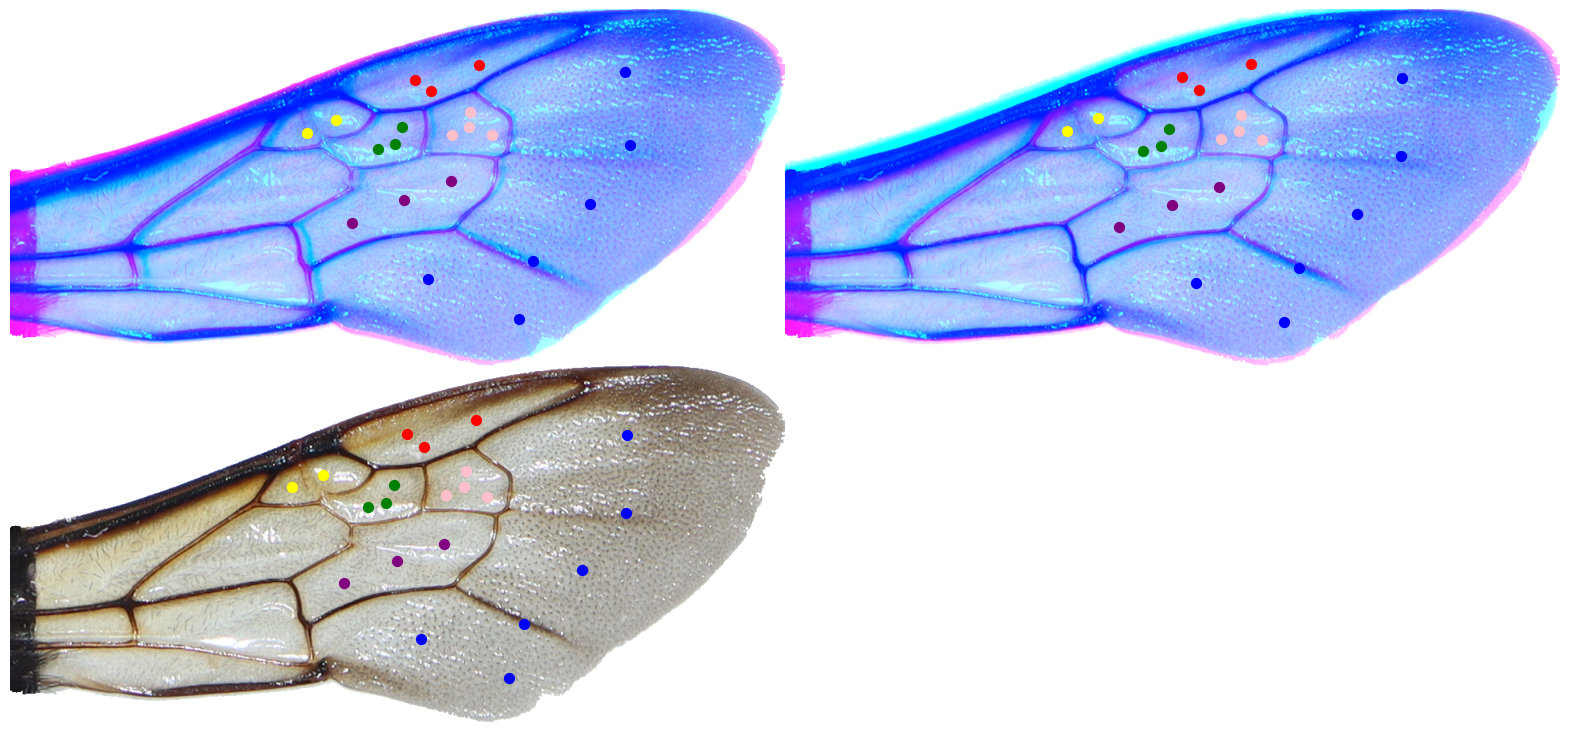

In [6]:
DEBUG = True
FIX_PROBLEMS = True

default_n_orb_features = 5000
mask_metadata_fps = sorted(glob('../2_live_bees/3_card_mask_matches_metadata/*'))
#np.random.shuffle(mask_metadata_fps)

for mask_metadata_fp in tqdm(mask_metadata_fps):
    reference_mask = cv2.imread('../2_live_bees/type_mask_Hive01_Sheet_01_slide17_left.png', cv2.IMREAD_GRAYSCALE)
    reference_seg = cv2.imread('../2_live_bees/type_seg_Hive01_Sheet_01_slide17_left.png')
    fn = mask_metadata_fp.split('/')[-1]
    
    if fn in manual_no_features.keys():
        n_orb_features = manual_no_features[fn]
    else:
        n_orb_features = 4000

    if FIX_PROBLEMS:
        if fn.replace('.json','.png') not in problem_wings:
            continue
    with open(mask_metadata_fp, 'r') as f:
        metadata = json.load(f)

    
    ref_pos = metadata['registration_pos']
    ref_scale = metadata['registration_scale']
    ref_angle = metadata['registration_angle']
    
    is_facing_up = metadata['is_facing_up?']
    
    
    mask_fp = '../2_live_bees/2_final_masks/' + fn.replace('.json','.png')
    mask = cv2.imread(mask_fp, cv2.IMREAD_GRAYSCALE)
    
    seg_fp = '../2_live_bees/2_card_segs/' + fn.replace('.json','.png')
    seg = cv2.cvtColor(cv2.imread(seg_fp), cv2.COLOR_BGR2RGB)

    
    matched = match_histograms(seg, reference_seg, channel_axis=-1)

    if not is_facing_up:
        reference_mask = np.flipud(reference_mask)
        reference_seg = np.flipud(reference_seg)

    img = (np.ones(matched.shape)*255).astype('uint8')
    gray_ref = cv2.cvtColor(place_in_img(img, reference_seg, ref_pos, ref_scale, ref_angle, fill=255), cv2.COLOR_BGR2GRAY)
    gray_seg = cv2.cvtColor(seg, cv2.COLOR_BGR2GRAY)

    
    overlaid = np.ones(seg.shape)*255
    overlaid[:,:,0] = gray_ref
    overlaid[:,:,1] = gray_seg
    overlaid = overlaid.astype('uint8')

    gray_overlaid = cv2.cvtColor(overlaid, cv2.COLOR_BGR2GRAY)

    sy, sx = np.array(np.where(gray_overlaid < 240)).min(axis=1)
    ey, ex = np.array(np.where(gray_overlaid < 240)).max(axis=1)
    overlaid = overlaid[sy:ey, sx:ex]


    if fn in needs_manual_fixing or fn.replace('.json','.png') in cant_see:
        metadata_fp = '../2_live_bees/6_fine_registered_wings_metadata/' + fn
        metadata = {'crop_x': [int(sx), int(ex)],
                   'crop_y': [int(sy), int(ey)]}
        with open(metadata_fp, 'w') as f:
            json.dump(metadata, f)
        continue
    
    
    FWL_points_trans1 = transform_points(FWL_points, (reference_seg.shape[1]//2, reference_seg.shape[0]//2), 
                                         ref_pos[::-1], ref_scale, ref_angle, is_facing_up, reference_seg.shape[0])
    MC_points_trans1 = transform_points(MC_points, (reference_seg.shape[1]//2, reference_seg.shape[0]//2), 
                                         ref_pos[::-1], ref_scale, ref_angle, is_facing_up, reference_seg.shape[0])
    SM1s_points_trans1 = transform_points(SM1s_points, (reference_seg.shape[1]//2, reference_seg.shape[0]//2), 
                                         ref_pos[::-1], ref_scale, ref_angle, is_facing_up, reference_seg.shape[0])
    SM2s_points_trans1 = transform_points(SM2s_points, (reference_seg.shape[1]//2, reference_seg.shape[0]//2), 
                                         ref_pos[::-1], ref_scale, ref_angle, is_facing_up, reference_seg.shape[0])
    SM3s_points_trans1 = transform_points(SM3s_points, (reference_seg.shape[1]//2, reference_seg.shape[0]//2), 
                                         ref_pos[::-1], ref_scale, ref_angle, is_facing_up, reference_seg.shape[0])
    MdC2_points_trans1 = transform_points(MdC2_points, (reference_seg.shape[1]//2, reference_seg.shape[0]//2), 
                                         ref_pos[::-1], ref_scale, ref_angle, is_facing_up, reference_seg.shape[0])
    other_points_trans1 = transform_points(other_points, (reference_seg.shape[1]//2, reference_seg.shape[0]//2), 
                                         ref_pos[::-1], ref_scale, ref_angle, is_facing_up, reference_seg.shape[0])

    trans1s = [FWL_points_trans1, MC_points_trans1, SM1s_points_trans1, SM2s_points_trans1, 
              SM3s_points_trans1, MdC2_points_trans1]
    
    height, width = gray_seg.shape
    
    # Create ORB detector with 5000 features.
    orb_detector = cv2.ORB_create(n_orb_features, scaleFactor=3)
    #sift_detector = cv2.SIFT_create(n_orb_features)
    
    # Find keypoints and descriptors.
    # The first arg is the image, second arg is the mask
    #  (which is not required in this case).
    kp1, d1 = orb_detector.detectAndCompute(gray_ref, None)
    kp2, d2 = orb_detector.detectAndCompute(gray_seg, None)
    
    # Match features between the two images.
    # We create a Brute Force matcher with 
    # Hamming distance as measurement mode.
    matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
    
    # Match the two sets of descriptors.
    #matches = list(matcher.match(d1, d2))
    matches = list(matcher.match(d1, d2))
    
    # Sort matches on the basis of their Hamming distance.
    matches.sort(key = lambda x: x.distance)
    
    # Take the top 90 % matches forward.
    matches = matches[:int(len(matches)*0.9)]
    no_of_matches = len(matches)
    
    # Define empty matrices of shape no_of_matches * 2.
    p1 = np.zeros((no_of_matches, 2))
    p2 = np.zeros((no_of_matches, 2))
    
    for i in range(len(matches)):
      p1[i, :] = kp1[matches[i].queryIdx].pt
      p2[i, :] = kp2[matches[i].trainIdx].pt
    
    # Find the homography matrix.
    homography, _ = cv2.findHomography(p1, p2, cv2.RANSAC)
    
    # Use this matrix to transform the
    # colored image wrt the reference image.
    transformed_gray = cv2.warpPerspective(gray_ref,
                        homography, (width, height),borderValue=255)
    
    overlaid_transformed = np.ones(overlaid.shape)*255
    overlaid_transformed[:,:,0] = transformed_gray[sy:ey, sx:ex]
    overlaid_transformed[:,:,1] = gray_seg[sy:ey, sx:ex]
    
    FWL_points_trans2 = cv2.perspectiveTransform(FWL_points_trans1.reshape(FWL_points_trans1.shape[0], 1, -1), homography).squeeze()
    MC_points_trans2 = cv2.perspectiveTransform(MC_points_trans1.reshape(MC_points_trans1.shape[0], 1, -1), homography).squeeze()
    SM1s_points_trans2 = cv2.perspectiveTransform(SM1s_points_trans1.reshape(SM1s_points_trans1.shape[0], 1, -1), homography).squeeze()
    SM2s_points_trans2 = cv2.perspectiveTransform(SM2s_points_trans1.reshape(SM2s_points_trans1.shape[0], 1, -1), homography).squeeze()
    SM3s_points_trans2 = cv2.perspectiveTransform(SM3s_points_trans1.reshape(SM3s_points_trans1.shape[0], 1, -1), homography).squeeze()
    MdC2_points_trans2 = cv2.perspectiveTransform(MdC2_points_trans1.reshape(MdC2_points_trans1.shape[0], 1, -1), homography).squeeze()
    other_points_trans2 = cv2.perspectiveTransform(other_points_trans1.reshape(other_points_trans1.shape[0], 1, -1), homography).squeeze()
    trans2s = [FWL_points_trans2, MC_points_trans2, SM1s_points_trans2, SM2s_points_trans2, 
              SM3s_points_trans2, MdC2_points_trans2]
    
    if fn in good_enough_as_is:
        FWL_points_trans2, MC_points_trans2, SM1s_points_trans2, SM2s_points_trans2, \
              SM3s_points_trans2, MdC2_points_trans2 = trans1s
        trans2s = trans1s

    # remove any points which are not in the image
    
    for i in range(len(trans2s)):
        indices_to_remove = []
        for j in range(len(trans2s[i])):
            if trans2s[i][j][0] < 0 or trans2s[i][j][1] < 0 or trans2s[i][j][1] > mask.shape[0] or trans2s[i][j][0] > mask.shape[1]:
                indices_to_remove += [j]    
        trans2s[i] = np.delete(trans2s[i], indices_to_remove, axis=0)
    
    indices_to_remove = []
    for j in range(len(other_points_trans2)):
        if other_points_trans2[j][0] < 0 or other_points_trans2[j][1] < 0 or other_points_trans2[j][1] > mask.shape[0] or other_points_trans2[j][0] > mask.shape[1]:
            indices_to_remove += [j]    
    other_points_trans2 = np.delete(other_points_trans2, indices_to_remove, axis=0)
                
    
    # move any points which are not on the wing to other points
    for i in range(len(trans2s)):
        indices_to_remove = []
        for j in range(len(trans2s[i])):
            if mask[tuple(trans2s[i][j].astype('int')[::-1])] < 0.5:
                other_points_trans2 = np.append(other_points_trans2, [trans2s[i][j]], axis=0)
                indices_to_remove += [j]  
        trans2s[i] = np.delete(trans2s[i], indices_to_remove, axis=0)

                
    # remove any of the 'other' points which are on the wing
    indices_to_remove = []
    for j in range(len(other_points_trans2)):
        if mask[tuple(other_points_trans2[j].astype('int')[::-1])] > 0.5:
            indices_to_remove += [j]    
    other_points_trans2 = np.delete(other_points_trans2, indices_to_remove, axis=0)
    
    out_img = np.ones((overlaid.shape[0]*2, overlaid.shape[1]*2, 3))*255
    out_img[:overlaid.shape[0],:overlaid.shape[1]] = overlaid
    out_img[:overlaid.shape[0],overlaid.shape[1]:] = overlaid_transformed
    out_img[overlaid.shape[0]:,:overlaid.shape[1]] = seg[sy:ey, sx:ex]
    
    
    # Save the output.
    out_fp = '../2_live_bees/6_fine_registered_wings/' + fn.replace('.json','.png')
    metadata_fp = '../2_live_bees/6_fine_registered_wings_metadata/' + fn
    metadata = {'crop_x': [int(sx), int(ex)],
               'crop_y': [int(sy), int(ey)],
                'homography': homography.tolist(),
                'width':width,
                'height':height,
                'SAM_points':{
                    'MC':MC_points_trans2.tolist(),
                    '1sMC':SM1s_points_trans2.tolist(),
                    '2sMC':SM2s_points_trans2.tolist(),
                    '3sMC':SM3s_points_trans2.tolist(),
                    '2MdC':MdC2_points_trans2.tolist(),
                    'FWL':FWL_points_trans2.tolist(),
                    'other':other_points_trans2.tolist()
                }
               }
    cv2.imwrite(out_fp, out_img)

    
    plt.figure(figsize=(15,15))
    plt.imshow(out_img.astype('uint8'))
    colors = ['blue','red', 'yellow','green','pink', 'purple','orange']
    for trans1, trans2, color in zip(trans1s, trans2s, colors):
        plt.scatter(trans1[:,0]-sx,trans1[:,1]-sy, s=50, color=color)
        plt.scatter(trans2[:,0]-sx+overlaid.shape[1],trans2[:,1]-sy, s=50, color=color)
        plt.scatter(trans2[:,0]-sx,trans2[:,1]-sy+overlaid.shape[0], s=50, color=color)
    plt.axis('off')
    plt.savefig(out_fp, bbox_inches='tight')
    plt.close()
    with open(metadata_fp, 'w') as f:
        json.dump(metadata, f)
    if DEBUG:
        plt.figure(figsize=(20,20))
        plt.imshow(out_img.astype('uint8'))
        colors = ['blue','red', 'yellow','green','pink', 'purple','orange']
        for trans1, trans2, color in zip(trans1s, trans2s, colors):
            plt.scatter(trans1[:,0]-sx,trans1[:,1]-sy, s=50, color=color)
            plt.scatter(trans2[:,0]-sx+overlaid.shape[1],trans2[:,1]-sy, s=50, color=color)
            plt.scatter(trans2[:,0]-sx,trans2[:,1]-sy+overlaid.shape[0], s=50, color=color)
        plt.axis('off')
    
    if DEBUG:
        break
if fn in manual_no_features.keys():
    print('ALREADY MANUALLY TWEAKED!!!', manual_no_features[fn])

In [1]:
problem_wings = ['2024_08_02_h33b28.png'  ]

In [7]:
metadata

{'crop_x': [0, 985],
 'crop_y': [1780, 2233],
 'homography': [[3.6506808656793384, 0.556747082789874, -1297.3442888640186],
  [0.8518786834767614, 5.621499978941528, -4949.29665133381],
  [0.0003736799232270922, 0.0010815915865347249, 1.0]],
 'width': 1407,
 'height': 4130,
 'SAM_points': {'MC': [[503.6083180033128, 1865.9086572129422],
   [591.8497991983027, 1848.586659020286],
   [526.2698120624216, 1882.3684689875224]],
  '1sMC': [[357.67565190229584, 1934.2514968999453],
   [397.1396113640741, 1918.0519667405479]],
  '2sMC': [[455.05928981364457, 1959.4368977172799],
   [487.4727296571405, 1931.3757326434963],
   [477.6081211737325, 1953.863284667825]],
  '3sMC': [[575.974089553786, 1934.2540272527744],
   [578.5787975424511, 1913.6207265328358],
   [605.8714344170785, 1946.0290324450066],
   [554.1885944381154, 1944.2986775211248]],
  '2MdC': [[490.9366748685705, 2028.3979554032383],
   [423.52687599323093, 2056.337429019362],
   [551.5131136092554, 2005.662135804869]],
  'FWL': [